<h1 align='center'> Song Similarity Analysis using Machine Learning  </h1>
<br>
<p>The project tries to find how similar are various songs and genres with respect to each other
<p>
<p>The Algorithms and methods used are Pearson Correlation, t-SNE and FUZZY C-MEANS.
</p>
<h2>Why Fuzzy C-means ? </h2>
<p> One of the main advantages of using the fuzzy c-means clustering algorithm is its ability to assign membership values to each data tuple in the dataset, indicating the degree to which it belongs to each cluster. This allows for a more nuanced representation of data points, capturing their probabilistic association with multiple clusters rather than rigidly assigning them to a single cluster.</p>











<h4>Dependencies required-:</h4>

In [1]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=40506077f4de022d9a3a7e3b966a77ab60f12efc0bf647fc8b171408b64d0706
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


<h4>Libraries used</h4>

In [2]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import pairwise_distances_argmin_min

In [5]:
df = pd.read_excel('/content/ALL_Features.xlsx')
df.head()
df.shape

(254, 2265)

<h3>The dataset comprises of around 250 songs, where we have 5 different genres and around 50 songs from each genre.It is noteworthy that the duration of each individual composition precisely amounts to a concise span of 30 seconds.<h3>
<hr size=0.5px>


 <h3>To extract a comprehensive set of features from these songs, we utilized a Music information retrieva called jAudio.It gave around 2256 features and These features include, but are not limited to, spectral centroid, melfrequency cepstral coefficients (MFCCs), zerocrossing rate, and rhythmic features such as beat histogram and tempo. </h3>

In [6]:
df['Genre'].unique()

array([1, 2, 3, 4, 5])

<h3>Here the five different genres are-: <br>
1.Hip-Hop<br>2.Pop<br> 3.Rock<br>4.Carnatic<br>5.Jazz
 </h3>


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Columns: 2265 entries, Genre to Derivative of Standard Deviation of Partial Based Spectral Flux Overall Average
dtypes: float64(2264), int64(1)
memory usage: 4.4 MB


In [8]:
df_filled = df.fillna(0)
df.fillna(0, inplace=True)

In [9]:
df_drop = df.drop(labels=['Genre'], axis=1)

<h3>Pearson Correlation Coefficient</h3>




In [10]:
# Compute the correlation matrix
corr_matrix = df_drop.corr()

# Define the correlation threshold
threshold = 0.9

# Find the correlated feature pairs
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

# Drop the correlated features from the DataFrame
df_dropped = df_drop.drop(correlated_features, axis=1)

In [12]:
corr_matrix

,Magnitude Spectrum Overall Standard Deviation1,Magnitude Spectrum Overall Standard Deviation2,Magnitude Spectrum Overall Standard Deviation3,Magnitude Spectrum Overall Standard Deviation4,Magnitude Spectrum Overall Standard Deviation5,Magnitude Spectrum Overall Standard Deviation6,Magnitude Spectrum Overall Standard Deviation7,Magnitude Spectrum Overall Standard Deviation8,Magnitude Spectrum Overall Standard Deviation9,Magnitude Spectrum Overall Standard Deviation10,...,Running Mean of Partial Based Spectral Flux Overall Standard Deviation,Standard Deviation of Partial Based Spectral Flux Overall Standard Deviation,Derivative of Running Mean of Partial Based Spectral Flux Overall Standard Deviation,Derivative of Standard Deviation of Partial Based Spectral Flux Overall Standard Deviation,Partial Based Spectral Flux Overall Average,Derivative of Partial Based Spectral Flux Overall Average,Running Mean of Partial Based Spectral Flux Overall Average,Standard Deviation of Partial Based Spectral Flux Overall Average,Derivative of Running Mean of Partial Based Spectral Flux Overall Average,Derivative of Standard Deviation of Partial Based Spectral Flux Overall Average
Magnitude Spectrum Overall Standard Deviation1,1.000000,0.885197,0.766852,0.685817,0.642498,0.571259,0.498809,0.412733,0.360576,0.324267,...,0.020761,0.020741,0.038678,0.038720,0.043479,0.072763,0.043302,0.043324,0.019260,0.019309
Magnitude Spectrum Overall Standard Deviation2,0.885197,1.000000,0.939513,0.809489,0.723714,0.638611,0.540243,0.427273,0.353206,0.311086,...,0.062458,0.062442,0.075796,0.075823,0.078761,0.083210,0.078657,0.078670,0.061203,0.061244
Magnitude Spectrum Overall Standard Deviation3,0.766852,0.939513,1.000000,0.922623,0.796295,0.690230,0.597643,0.489367,0.388288,0.318393,...,0.058615,0.058612,0.059731,0.059728,0.059287,0.039951,0.059310,0.059308,0.058354,0.058362
Magnitude Spectrum Overall Standard Deviation4,0.685817,0.809489,0.922623,1.000000,0.913103,0.792268,0.699328,0.611954,0.482392,0.388641,...,0.023316,0.023321,0.017628,0.017613,0.015717,-0.004617,0.015791,0.015782,0.023704,0.023692
Magnitude Spectrum Overall Standard Deviation5,0.642498,0.723714,0.796295,0.913103,1.000000,0.921045,0.763887,0.665453,0.532799,0.432718,...,0.006420,0.006410,0.015731,0.015753,0.018282,0.035112,0.018188,0.018199,0.005653,0.005678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Derivative of Partial Based Spectral Flux Overall Average,0.072763,0.083210,0.039951,-0.004617,0.035112,0.035390,0.033852,0.057454,-0.012197,0.000763,...,0.504607,0.504365,0.710337,0.710795,0.762016,1.000000,0.760143,0.760373,0.486584,0.487173
Running Mean of Partial Based Spectral Flux Overall Average,0.043302,0.078657,0.059310,0.015791,0.018188,0.015833,0.067699,0.075844,-0.003738,0.012600,...,0.944540,0.944447,0.997296,0.997344,0.999996,0.760143,1.000000,1.000000,0.937522,0.937756
Standard Deviation of Partial Based Spectral Flux Overall Average,0.043324,0.078670,0.059308,0.015782,0.018199,0.015845,0.067690,0.075844,-0.003743,0.012595,...,0.944424,0.944331,0.997270,0.997318,0.999997,0.760373,1.000000,1.000000,0.937399,0.937634
Derivative of Running Mean of Partial Based Spectral Flux Overall Average,0.019260,0.061203,0.058354,0.023704,0.005653,0.002338,0.072899,0.071212,0.001505,0.016532,...,0.999785,0.999790,0.960556,0.960375,0.936514,0.486584,0.937522,0.937399,1.000000,1.000000


Above is the correlation matrix which shows how similar are two features with respect to each other

In [13]:
print(correlated_features)

{'Power Spectrum Overall Average146', 'Magnitude Spectrum Overall Standard Deviation194', 'Beat Histogram Overall Average142', 'Power Spectrum Overall Average127', 'Power Spectrum Overall Standard Deviation183', 'Power Spectrum Overall Average175', 'Power Spectrum Overall Average25', 'Beat Histogram Overall Average124', 'Power Spectrum Overall Average81', 'Beat Histogram Overall Average75', 'Magnitude Spectrum Overall Average198', 'Magnitude Spectrum Overall Standard Deviation232', 'Beat Histogram Overall Standard Deviation62', 'Magnitude Spectrum Overall Average106', 'Beat Histogram Overall Average111', 'Strength Of Strongest Beat Overall Average', 'Beat Histogram Overall Standard Deviation107', 'ConstantQ Overall Standard Deviation97', 'Power Spectrum Overall Average157', 'Running Mean of Strongest Frequency Via Spectral Centroid Overall Standard Deviation', 'Power Spectrum Overall Standard Deviation60', 'Magnitude Spectrum Overall Average156', 'Power Spectrum Overall Average218', 'B

<h4>Above is the list of all features who have more than 90% similarity with respect to another feature.Hence they are being removed as these would just be redundant features.</h4>

In [14]:
df_dropped.head()

,Magnitude Spectrum Overall Standard Deviation1,Magnitude Spectrum Overall Standard Deviation2,Magnitude Spectrum Overall Standard Deviation7,Magnitude Spectrum Overall Standard Deviation8,Magnitude Spectrum Overall Standard Deviation9,Magnitude Spectrum Overall Standard Deviation10,Magnitude Spectrum Overall Standard Deviation11,Magnitude Spectrum Overall Standard Deviation12,Magnitude Spectrum Overall Standard Deviation13,Magnitude Spectrum Overall Standard Deviation14,...,Derivative of Strength Of Strongest Beat Overall Average,Derivative of Running Mean of Strength Of Strongest Beat Overall Average,Derivative of Strongest Frequency Via FFT Maximum Overall Average,Derivative of Peak Based Spectral Smoothness Overall Average,Derivative of Relative Difference Function Overall Average,Partial Based Spectral Centroid Overall Standard Deviation,Derivative of Partial Based Spectral Centroid Overall Average,Derivative of Running Mean of Partial Based Spectral Centroid Overall Average,Partial Based Spectral Flux Overall Standard Deviation,Derivative of Partial Based Spectral Flux Overall Average
0,0.007289,0.005387,0.012180,0.006828,0.004963,0.004635,0.004456,0.004683,0.005053,0.005263,...,8.038000e-07,8.957000e-07,0.0000,-0.15310,0.000934,0.000,0.000000,0.000000,0.0,0.0
1,0.003097,0.011890,0.007723,0.007325,0.005893,0.005432,0.003738,0.002753,0.002546,0.002210,...,5.030000e-07,1.278000e-07,0.0000,0.01575,-0.000858,2.069,0.001736,0.000816,0.0,0.0
2,0.000591,0.004097,0.006737,0.007106,0.006193,0.005486,0.004901,0.004607,0.004200,0.004220,...,1.622000e-07,4.073000e-08,-0.2001,-0.02513,0.000122,1.455,-0.000911,0.000060,0.0,0.0
3,0.009932,0.020290,0.013800,0.009246,0.009272,0.008051,0.005991,0.004709,0.004563,0.005590,...,3.817000e-07,-4.935000e-07,0.2001,0.06766,-0.000904,2.496,0.003744,0.001932,0.0,0.0
4,0.007158,0.032110,0.009183,0.007063,0.006541,0.007576,0.007711,0.007630,0.006989,0.003627,...,-1.096000e-06,9.698000e-08,0.0000,0.06975,0.001279,2.826,0.001838,0.000894,0.0,0.0


A total of 1451 features were dropped and now we have a dataset of size 254 x 805

In [15]:
df_dropped.shape

(254, 805)

In [17]:

column_names = np.array(df_dropped.columns.values)

<h4>Normalising the dataset</h4>






In [18]:
# Read the normalized dataset from Excel
df = pd.read_excel('/content/ALL_Features.xlsx')

# Assuming your DataFrame is named df
df.fillna(0, inplace=True)

data_selected_features = df[column_names].values

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected features
data_selected_normalized = scaler.fit_transform(data_selected_features)

<h3>We are applying t-SNE Algorithm here to overcome the curse of dimensionality by reducing the data to a more manageable and interpretable representation. </h3>

In [19]:
# Apply t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
data_selected_tsne = tsne.fit_transform(data_selected_normalized)

After getting the reduced dataset we apply fuzzy c-means clustering to identify and group similar songs points based on their characteristics.

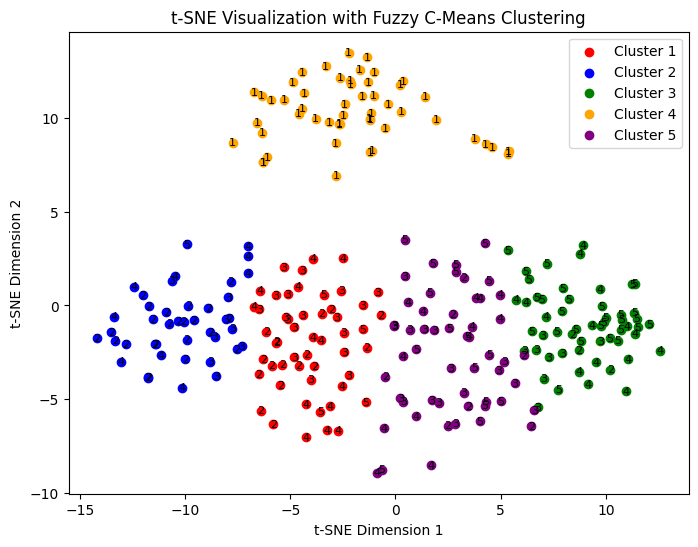

In [20]:
# Apply fuzzy c-means clustering
n_clusters = 5
fuzzy_cmeans_data_selected = fuzz.cmeans(data_selected_tsne.T, n_clusters, 1.8, error=0.005, maxiter=1000, seed=42)

cluster_centers = fuzzy_cmeans_data_selected[0]
membership_probs = np.array(fuzzy_cmeans_data_selected[1])

# Assign cluster labels to data points
labels_pred_selected = pairwise_distances_argmin_min(data_selected_tsne, cluster_centers)[0]

# Define colors for each cluster
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Plot the t-SNE visualization with fuzzy c-means clustering
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(data_selected_tsne[labels_pred_selected == i, 0], data_selected_tsne[labels_pred_selected == i, 1], color=colors[i], label=f'Cluster {i+1}')

    # Labeling the data points with genre labels
    for j, (x, y) in enumerate(zip(data_selected_tsne[labels_pred_selected == i, 0], data_selected_tsne[labels_pred_selected == i, 1])):
        genre_label = df['Genre'].values[labels_pred_selected == i][j]
        plt.text(x, y, genre_label, color='black', fontsize=8, ha='center', va='center')

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization with Fuzzy C-Means Clustering')
plt.legend()

plt.show()

In [25]:
# Calculate membership for each song in each cluster
song_memberships = membership_probs.T

# Calculate the average membership for each genre
genre_labels = df['Genre'].values  # Replace 'Genre' with your target column
genre_memberships = np.zeros((len(np.unique(genre_labels)), n_clusters))
for i, genre in enumerate(np.unique(genre_labels)):
    genre_indices = np.where(genre_labels == genre)[0]
    genre_memberships[i] = np.mean(song_memberships[genre_indices], axis=0)

# Print the average membership for each genre
for i, genre in enumerate(np.unique(genre_labels)):
    print(f"Genre: {genre}, Average Memberships: {genre_memberships[i]}")


Genre: 1, Average Memberships: [0.0336234  0.02743369 0.02941184 0.87756998 0.03196109]
Genre: 2, Average Memberships: [0.31711725 0.4674917  0.08813867 0.01035649 0.11689588]
Genre: 3, Average Memberships: [0.35974731 0.15888852 0.1532869  0.0171943  0.31088296]
Genre: 4, Average Memberships: [0.25351137 0.18215015 0.29380258 0.02653909 0.24399681]
Genre: 5, Average Memberships: [0.10257009 0.03166501 0.54487586 0.02441753 0.29647151]


<h2> Results</h2>

In [26]:
# Create a dictionary to store the genre-average membership associations
genre_average_memberships = {}

# Iterate over each genre and average membership values
for i, genre in enumerate(np.unique(genre_labels)):
    average_memberships = genre_memberships[i]
    genre_average_memberships[f"Genre {genre}"] = average_memberships

# Tabulate the output
output_df = pd.DataFrame.from_dict(genre_average_memberships, orient='index')
output_df.columns = [f"Cluster {i+1}" for i in range(n_clusters)]
print(output_df)


         Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5
Genre 1   0.033623   0.027434   0.029412   0.877570   0.031961
Genre 2   0.317117   0.467492   0.088139   0.010356   0.116896
Genre 3   0.359747   0.158889   0.153287   0.017194   0.310883
Genre 4   0.253511   0.182150   0.293803   0.026539   0.243997
Genre 5   0.102570   0.031665   0.544876   0.024418   0.296472
